# Instacart Final Report

## Table Of Contents:

## Step 1: Importing Libraries and Dataset
## Step 2: Addressing Security Implications 
## Step 3a: Creating a Regional Flag 
## Step 3b: Analyzing spending by region
## Step 4a: Creating an exclusion flag for low-activity customers
## Step 4b: Creating a subset with only high-activity customers
## Step 5a: Age Profile
## Step 5b: Income Profile
## Step 5c: Pet Profile
## Step 5d: Diet Profile
## Step 5e: Family Profile
## Step 6: Visualizations of Profiles
## Step 7: Descriptive statistics for customer profiles
## Step 8a: Customer Profiles within Regions
## Step 8b: Customer Profiles within Departments
## Step 9: Visualizations of Customer Profiles by Regions and Departments
## Step 10: Exporting the dataset
## Extra Analysis Questions

## Step 1: Import the dataset from Exercise 4.9.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing combined dataset

In [2]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 4\05-2023 Instacart Basket Analysis'

In [3]:
# Import dataset

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Check to see if dataset was imported properly

ords_prods_all.head(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_all.shape

(32404859, 33)

In [6]:
ords_prods_all.dtypes

order_id                          object
user_id                           object
order_number                       int64
orders_day_of_week                 int64
order_hour_of_day                  int64
days_since_last_order            float64
product_id                         int64
add_to_cart_order                  int64
reordered                          int64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
_merge                          category
price_range_loc                   object
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
average_price                    float64
spending_status                   object
median_days_since_last_order     float64
customer_frequency_flag           object
first_name      

## Step 2: Consider any security implications that might exist for this new data. Address any PII data in the data before continuing your analysis.

#### There is PII data in the 'first_name' and 'surname' columns since they contains names that could be traced back to individuals. They should be omitted from data analysis or dropped. I will choose to drop them. All other columns don't seem to have any other security risks.

In [7]:
# Drop 'first_name' and surname columns

ords_prods_all = ords_prods_all.drop(columns = ['first_name', 'surname'])

In [8]:
# Check to see if the columns were dropped properly

ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_status', 'median_days_since_last_order',
       'customer_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [9]:
ords_prods_all.shape

(32404859, 31)

## Step 3: Create a regional segmentation of the data. Create a "Region" column based on the "state" column of the dataset. Determine if there's a difference in spending habits between the different U.S. regions.

### Create a Region Column

In [10]:
# Check counts of each state

ords_prods_all['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [11]:
# Create an empty region list

region = []

In [12]:
# Fill the list based on the state criteria

for value in ords_prods_all['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
         region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
         region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
         region.append('South')
    else:
         region.append('West')       

In [13]:
# Create new column with updated region list

ords_prods_all['region'] = region

In [14]:
# Check number of orders for each region

ords_prods_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### Analyzing Spending Status by Region

In [15]:
# Create a crosstab of 'region' and 'spending status'

crosstab_region_spending_status = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_status'], dropna = False)

In [16]:
# Check crosstab

crosstab_region_spending_status

spending_status,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


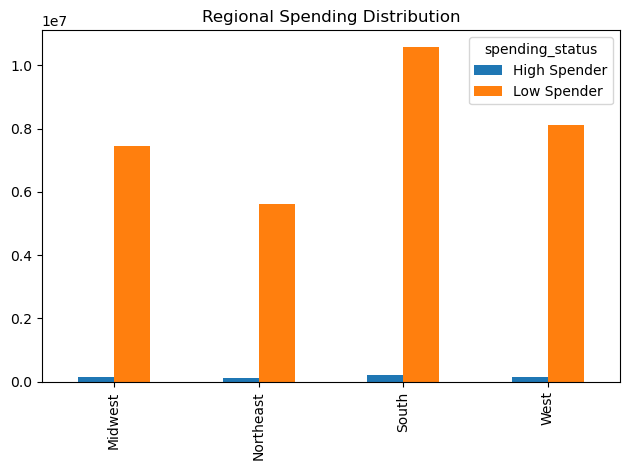

In [17]:
# Create a bar chart to represent the data

region_spending_status_bar = crosstab_region_spending_status.plot.bar()
plt.title('Regional Spending Distribution')
plt.xlabel('')
plt.tight_layout()

#### The percentage of high spenders to low spenders is relatively consistent throughout the regions, differing only by less than 1% per region.

In [18]:
# Export the bar chart.

region_spending_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spending_distribution.png'))

## Step 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

### Create the low-activity customer exclusion flag

In [19]:
# Create the exclusion flag based on the criteria

ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'activity_flag'] = 'Low-activity customer'

In [20]:
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'activity_flag'] = 'High-activity customer'

In [21]:
# Check to see if all rows were assigned the exclusion flag

ords_prods_all['activity_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: activity_flag, dtype: int64

### Create a subset with only high-activity customers

In [22]:
# Creating a subset that includes only high-activity customers

ords_prods_all_high_activity = ords_prods_all[ords_prods_all['activity_flag'] == 'High-activity customer']

In [23]:
# Check to see if the subset was created correctly

pd.set_option('display.max_rows', None)
ords_prods_all_high_activity.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity customer


In [24]:
ords_prods_all_high_activity['activity_flag'].value_counts(dropna = False)

High-activity customer    30964564
Name: activity_flag, dtype: int64

In [25]:
# Export the subset

ords_prods_all_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all_high_activity.pkl'))

In [26]:
ords_prods_all.shape

(32404859, 33)

## Step 5: Create a profiling variable based on age, income, certain goods in the "department_id" column, and number of dependents. You might also use the "orders_day_of_the_week" and "order_hour_of_day" columns if you can think of a way they would impact customer profiles.

### Age Profile:

In [27]:
# Create an age profile for seniors 65 and older

ords_prods_all.loc[ords_prods_all['age'] > 55, 'age_profile'] = 'Old Adult'

In [28]:
# Create an age profile for middle aged adults

ords_prods_all.loc[(ords_prods_all['age'] <= 55) & (ords_prods_all['age'] > 35), 'age_profile'] = 'Middle-Aged Adult'

In [29]:
# Create an age profile for young adults

ords_prods_all.loc[ords_prods_all['age'] <= 35, 'age_profile'] = 'Young Adult'

In [30]:
# Check counts for each group

ords_prods_all['age_profile'].value_counts(dropna = False)

Old Adult            13092160
Middle-Aged Adult    10166280
Young Adult           9146419
Name: age_profile, dtype: int64

### Income Profile:

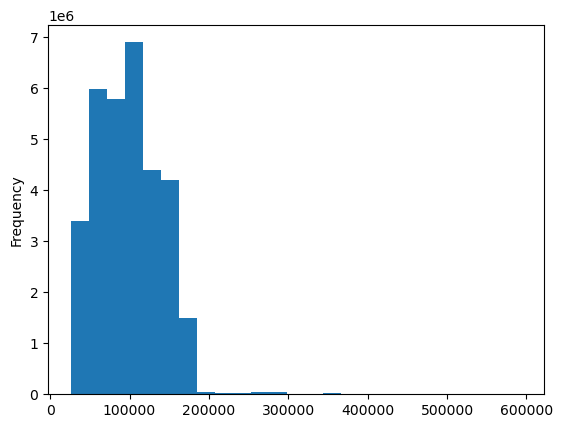

In [31]:
# Check the current distribution of income via a histogram

income_hist = ords_prods_all['income'].plot.hist(bins = 25)

#### Most of the data is centered around 100k, and it looks as if there are approximately 4 bars going up to 100k. Good intervals for the income profile would be: below 75k, between 75k and 150k, and over 150k.

In [32]:
#Create the first income profile that is up to and including 75k

ords_prods_all.loc[ords_prods_all['income'] <= 75000, 'income_profile'] = 'Low income'

In [33]:
#Create the second income profile that is between 75k and 150k, including 150k

ords_prods_all.loc[(ords_prods_all['income'] > 75000) & (ords_prods_all['income'] <=150000), 'income_profile'] = 'Middle income'

In [34]:
#Create the third income profile that for those making over 150k

ords_prods_all.loc[ords_prods_all['income'] > 150000, 'income_profile'] = 'High income'

In [35]:
#Check the value counts for each

ords_prods_all['income_profile'].value_counts(dropna = False)

Middle income    17911199
Low income       10442820
High income       4050840
Name: income_profile, dtype: int64

### Department_id Profile:

#### For this task, I chose to create multiple profiles depending on three different columns: pets (dept_id 8), meat and seafood (dept_id 12), and dairy and eggs (dept_id 16).

In [36]:
# Create a crosstab between department_id and user_id

department_user_crosstab = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['user_id'], dropna = False)

In [37]:
department_user_crosstab

user_id,1,10,100,1000,10000,100000,100001,100002,100003,100004,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,3,5,56,0,16,7,3,0,...,13,16,4,9,12,7,51,4,2,9
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,2,1,56,8,17,1,2,0,...,1,0,2,4,7,2,4,3,0,7
4,5,72,10,34,340,51,393,0,10,0,...,196,78,4,22,68,10,20,10,14,129
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
6,0,1,0,0,2,1,24,0,0,0,...,0,1,2,0,0,0,1,2,0,1
7,13,0,0,19,36,1,55,2,3,14,...,0,3,10,25,13,3,6,2,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,38,1,9,0,1,4,...,2,4,8,0,1,2,0,2,0,37


### Pet owners profile

In [38]:
# Create a data dictionary that will be filled with pet owner flags based on the crosstab

pet_dict = dict()
for user in department_user_crosstab:
    workinglist = department_user_crosstab[user].tolist()
    if workinglist[7] == 0:
        pet_dict[user] = 'No pets'
    else:
        pet_dict[user] = 'Pet owner'    

In [39]:
# Assign these user labels to an empty list 'pet_flag' to each user in the original dataset

pet_flag = []
for user in ords_prods_all['user_id']:
    pet_flag.append(pet_dict[user])

In [40]:
# Assign the values in the pet_flag list to a column in the dataset named 'pet_profile'

ords_prods_all['pet_profile'] = pet_flag

In [41]:
# Check to see if the column was created properly

ords_prods_all.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_profile,income_profile,pet_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets


In [42]:
# Check frequency distribution for pet_profile column

ords_prods_all['pet_profile'].value_counts(dropna = False)

No pets      28876718
Pet owner     3528141
Name: pet_profile, dtype: int64

### Diet Profile

#### For the diet profile, I chose to mark users based on whether or not they were vegetarians, vegans, or neither. Vegetarians would be marked if none of their orders came from department 12 (meat and seafood) and vegans would be marked if none of their orders came from either department 12 or department 16 (dairy and eggs).

In [43]:
# Create a data dictionary for the diet profile

diet_dict = dict()
for user in department_user_crosstab:
    diet_list = department_user_crosstab[user].tolist() 
    if diet_list[11] == 0 and diet_list[15] == 0:
        diet_dict[user] = 'Vegan'
    elif diet_list[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Regular'

In [44]:
# Assign these user labels to an empty list 'diet_flag' to each user in the original dataset

diet_flag = []
for user in ords_prods_all['user_id']:
    diet_flag.append(diet_dict[user])

In [45]:
# Assign the values in the diet_flag list to a column in the dataset named 'diet_profile'

ords_prods_all['diet_profile'] = diet_flag

In [46]:
# Check to see if the column was created properly

ords_prods_all.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_profile,income_profile,pet_profile,diet_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets,Vegetarian
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets,Vegetarian
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets,Vegetarian
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets,Vegetarian
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets,Vegetarian
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets,Vegetarian
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets,Vegetarian
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets,Vegetarian
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets,Vegetarian
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Young Adult,Low income,No pets,Vegetarian


In [47]:
# Check frequency distribution for pet_profile column

ords_prods_all['diet_profile'].value_counts(dropna = False)

Regular       23762619
Vegetarian     8258813
Vegan           383427
Name: diet_profile, dtype: int64

### Family Profile

In [48]:
# Check current distribution of values based on the number of dependants column

ords_prods_all['number_of_dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: number_of_dependants, dtype: int64

In [49]:
# Create a crosstab between number of dependants and marital status

dependants_marital_status_crosstab = pd.crosstab(ords_prods_all['marital_status'], ords_prods_all['number_of_dependants'], dropna = False)

In [50]:
# Check the crosstab results

dependants_marital_status_crosstab

number_of_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


#### The results of the crosstab show that those with no dependants are all either single adults or are divorced/widowed. These adults can all be profiled as Adults without dependants. Those with dependants can either be classified as Married Adults with children or Young Adults living with parents and siblings. 

In [51]:
# Create the first family profile label of "Single Adults without dependents"

ords_prods_all.loc[(ords_prods_all['marital_status'] != 'married') & (ords_prods_all['number_of_dependants'] == 0), 'family_profile'] = 'Single Adults without Dependents'

In [52]:
# Create the second family profile label of "Married Adults with dependents"

ords_prods_all.loc[(ords_prods_all['marital_status'] == 'married') & (ords_prods_all['number_of_dependants'] >= 1), 'family_profile'] = 'Married Adults with Dependents'

In [53]:
# Create the third family profile label of "Young Adults with dependents"

ords_prods_all.loc[(ords_prods_all['marital_status'] != 'married') & (ords_prods_all['number_of_dependants'] >= 1), 'family_profile'] = 'Young Adults with family or dependents'

In [54]:
# Check the value counts of the profile

ords_prods_all['family_profile'].value_counts(dropna = False)

Married Adults with Dependents            22756753
Single Adults without Dependents           8097503
Young Adults with family or dependents     1550603
Name: family_profile, dtype: int64

In [55]:
ords_prods_all.shape

(32404859, 38)

## Step 6: Create an appropriate visualization to show the distribution of profiles.

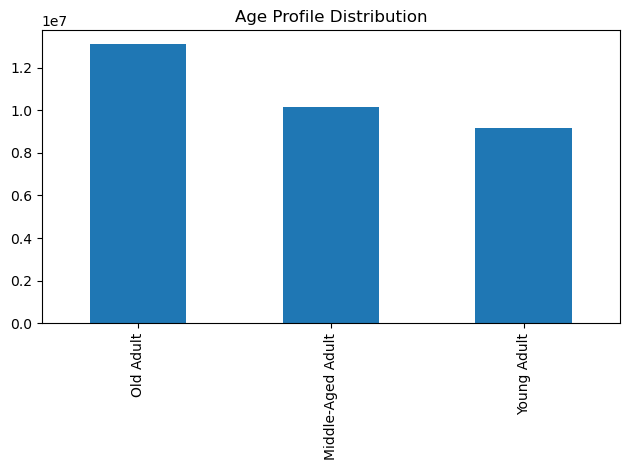

In [117]:
# Create a bar chart to show age profile

age_profile_bar = ords_prods_all['age_profile'].value_counts(dropna = False).plot.bar()
plt.title('Age Profile Distribution')
plt.tight_layout()

In [118]:
# Export age profile bar chart 

age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile.png'))

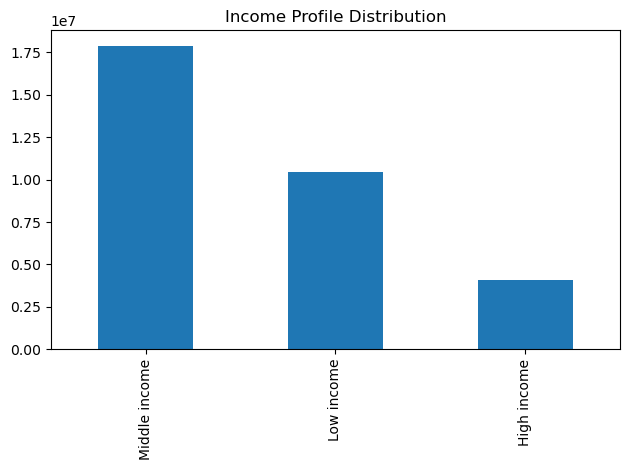

In [119]:
#Create a bar chart to show income profile

income_profile_bar = ords_prods_all['income_profile'].value_counts().plot.bar() 
plt.title('Income Profile Distribution')
plt.tight_layout()

In [120]:
# Export income profile bar chart 

income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile.png'))

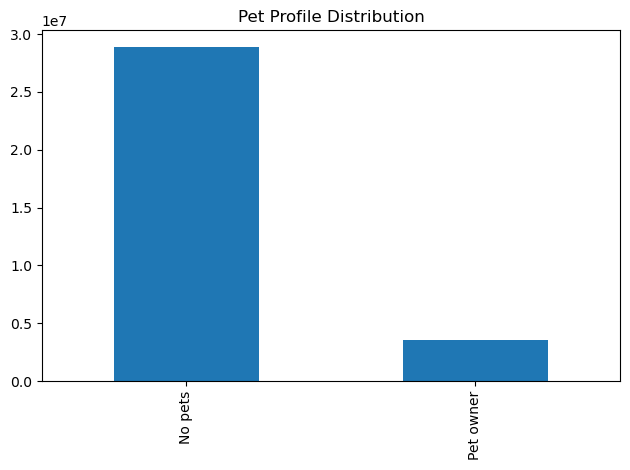

In [121]:
#Create a bar chart to show pet profile

pet_profile_bar = ords_prods_all['pet_profile'].value_counts().plot.bar() 
plt.title('Pet Profile Distribution')
plt.tight_layout()

In [122]:
# Export Pet profile bar chart 

pet_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_profile.png'))

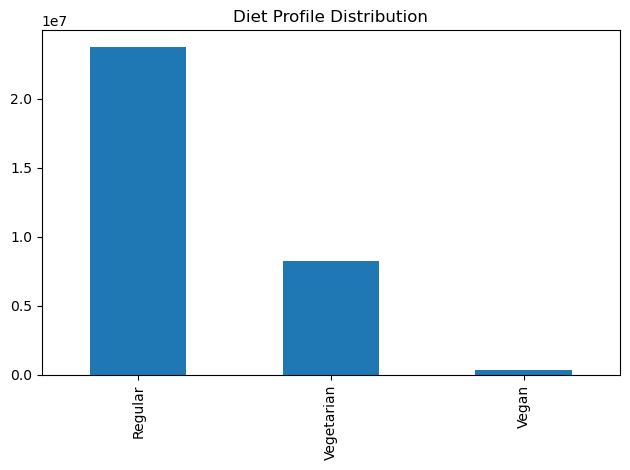

In [123]:
#Create a bar chart to show diet profile

diet_profile_bar = ords_prods_all['diet_profile'].value_counts().plot.bar() 
plt.title('Diet Profile Distribution')
plt.tight_layout()

In [124]:
# Export Diet profile bar chart 

diet_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_profile.png'))

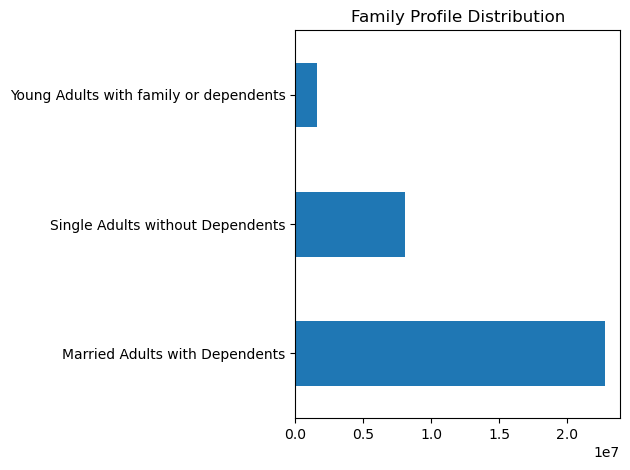

In [242]:
#Create a bar chart to show family profile

family_profile_bar = ords_prods_all['family_profile'].value_counts().plot.barh() 
plt.title('Family Profile Distribution')
plt.tight_layout()

In [243]:
# Export Family profile bar chart 

family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_family_profile.png'))

## Step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [127]:
ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_status', 'median_days_since_last_order',
       'customer_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'region',
       'activity_flag', 'age_profile', 'income_profile', 'pet_profile',
       'diet_profile', 'family_profile'],
      dtype='object')

In [128]:
# Need to change outlier prices of 99999 and 14999 to NaN's for calculation purposes. These outliers affect the mean and max values.

ords_prods_all.loc[ords_prods_all['prices'] > 100, 'prices'] = np.nan

In [129]:
# Find stats of age profile

ords_prods_all.groupby('age_profile').agg({'days_since_last_order' : ['max', 'min', 'mean'], 'prices' : ['max', 'min', 'mean']})

days_since_last_order                 prices               
                                    max  min       mean    max  min      mean
age_profile                                                                  
Middle-Aged Adult                  30.0  0.0  11.093976   25.0  1.0  7.790604
Old Adult                          30.0  0.0  11.097411   25.0  1.0  7.795428
Young Adult                        30.0  0.0  11.124858   25.0  1.0  7.785081

In [130]:
# Find stats of income profile

ords_prods_all.groupby('income_profile').agg({'days_since_last_order' : ['max', 'min', 'mean'], 'prices' : ['max', 'min', 'mean']})

days_since_last_order                 prices               
                                 max  min       mean    max  min      mean
income_profile                                                            
High income                     30.0  0.0  10.941399   25.0  1.0  7.947022
Low income                      30.0  0.0  11.240572   25.0  1.0  7.434737
Middle income                   30.0  0.0  11.061662   25.0  1.0  7.963462

In [131]:
# Find stats of pet profile

ords_prods_all.groupby('pet_profile').agg({'days_since_last_order' : ['max', 'min', 'mean'], 'prices' : ['max', 'min', 'mean']})

days_since_last_order                 prices               
                              max  min       mean    max  min      mean
pet_profile                                                            
No pets                      30.0  0.0  11.200417   25.0  1.0  7.788360
Pet owner                    30.0  0.0  10.327303   25.0  1.0  7.812556

In [132]:
# Find stats of diet profile

ords_prods_all.groupby('diet_profile').agg({'days_since_last_order' : ['max', 'min', 'mean'], 'prices' : ['max', 'min', 'mean']})

days_since_last_order                 prices               
                               max  min       mean    max  min      mean
diet_profile                                                            
Regular                       30.0  0.0  10.762605   25.0  1.0  7.905951
Vegan                         30.0  0.0  14.749275   20.0  1.0  7.009920
Vegetarian                    30.0  0.0  11.952600   20.0  1.0  7.496501

In [133]:
# Find stats of family profile

ords_prods_all.groupby('family_profile').agg({'days_since_last_order' : ['max', 'min', 'mean'], 'prices' : ['max', 'min', 'mean']})

days_since_last_order                  \
                                                         max  min       mean   
family_profile                                                                 
Married Adults with Dependents                          30.0  0.0  11.116175   
Single Adults without Dependents                        30.0  0.0  11.080805   
Young Adults with family or dependents                  30.0  0.0  11.048170   

                                       prices                 
                                          max  min      mean  
family_profile                                                
Married Adults with Dependents           25.0  1.0  7.790695  
Single Adults without Dependents         25.0  1.0  7.789975  
Young Adults with family or dependents   25.0  1.0  7.800712

## Step 8: Compare customer profiles with regions and departments. Is there a link between them? Customers may demonstrate different behaviors across regions which could make this information important.

### Customer profiles within regions:

In [134]:
# Create a crosstab to compare age profiles within different regions

age_profile_region_crosstab = pd.crosstab(ords_prods_all['age_profile'], ords_prods_all['region'], dropna = False, normalize = 'columns')

In [135]:
# Check the crosstab

age_profile_region_crosstab

region,Midwest,Northeast,South,West
age_profile,,,,
Middle-Aged Adult,0.320319,0.307506,0.311401,0.315007
Old Adult,0.401328,0.408835,0.402545,0.405077
Young Adult,0.278353,0.283659,0.286054,0.279916


#### Age groups seem to be relatively similar throughout the regions. 

In [136]:
# Create a crosstab to compare income profiles within different regions

income_profile_region_crosstab = pd.crosstab(ords_prods_all['income_profile'], ords_prods_all['region'], dropna = False, normalize = 'columns')

In [137]:
# Check the crosstab

income_profile_region_crosstab

region,Midwest,Northeast,South,West
income_profile,,,,
High income,0.125757,0.123497,0.124358,0.126208
Low income,0.319571,0.318405,0.323672,0.325550
Middle income,0.554673,0.558098,0.551970,0.548242


#### Income groups seem to be relatively similar throughout the regions as well.

In [138]:
# Create a crosstab to compare pet profiles within different regions

pet_profile_region_crosstab = pd.crosstab(ords_prods_all['pet_profile'], ords_prods_all['region'], dropna = False, normalize = 'columns')

In [139]:
# Check the crosstab

pet_profile_region_crosstab

region,Midwest,Northeast,South,West
pet_profile,,,,
No pets,0.888836,0.892981,0.894204,0.887927
Pet owner,0.111164,0.107019,0.105796,0.112073


#### Pet owner proportions seem relatively similar throughout the regions. 

In [140]:
# Create a crosstab to compare diet profiles within different regions

diet_profile_region_crosstab = pd.crosstab(ords_prods_all['diet_profile'], ords_prods_all['region'], dropna = False, normalize = 'columns')

In [141]:
# Check the crosstab

diet_profile_region_crosstab

region,Midwest,Northeast,South,West
diet_profile,,,,
Regular,0.730808,0.734091,0.733396,0.734928
Vegan,0.011885,0.011841,0.011611,0.012066
Vegetarian,0.257307,0.254068,0.254993,0.253005


#### Diet profiles seem relatively consistent throughout the regions.

In [142]:
# Create a crosstab to compare family profiles within different regions

family_profile_region_crosstab = pd.crosstab(ords_prods_all['family_profile'], ords_prods_all['region'], dropna = False, normalize = 'columns')

In [143]:
family_profile_region_crosstab

region,Midwest,Northeast,South,West
family_profile,,,,
Married Adults with Dependents,0.700985,0.705313,0.700586,0.703514
Single Adults without Dependents,0.250772,0.247836,0.250342,0.249893
Young Adults with family or dependents,0.048243,0.046851,0.049072,0.046593


#### The rates for different family profiles are relatively consistent throughout the regions.

### Customer Profiles within Departments

In [144]:
# Create a crosstab to compare age profiles within different departments

age_profile_department_crosstab = pd.crosstab(ords_prods_all['age_profile'], ords_prods_all['department_id'], dropna = False, normalize = 'columns')

In [145]:
# Check the crosstab

pd.set_option('display.max_columns', None)
age_profile_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
age_profile,,,,,,,,,,,,,,,,,,,,,
Middle-Aged Adult,0.312903,0.314899,0.313426,0.314116,0.311472,0.315874,0.313977,0.306009,0.313526,0.310878,0.316874,0.311273,0.312983,0.313726,0.312943,0.313217,0.314208,0.326841,0.313425,0.312655,0.313544
Old Adult,0.405667,0.398225,0.403502,0.404360,0.396217,0.399416,0.406929,0.410260,0.403364,0.401990,0.403571,0.407922,0.404877,0.400923,0.403198,0.402640,0.405744,0.396131,0.402897,0.404646,0.396746
Young Adult,0.281430,0.286876,0.283072,0.281524,0.292311,0.284710,0.279094,0.283730,0.283110,0.287132,0.279555,0.280805,0.282140,0.285351,0.283859,0.284142,0.280048,0.277028,0.283678,0.282699,0.289710


#### Age groups seem to be relatively similar throughout the departments.

In [146]:
# Create a crosstab to compare income profiles within different departments

income_profile_department_crosstab = pd.crosstab(ords_prods_all['income_profile'], ords_prods_all['department_id'], dropna = False, normalize = 'columns')

In [147]:
# Check the crosstab

pd.set_option('display.max_columns', None)
income_profile_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
income_profile,,,,,,,,,,,,,,,,,,,,,
High income,0.129005,0.130859,0.131385,0.124389,0.162353,0.127326,0.120937,0.138299,0.128369,0.109131,0.125238,0.135024,0.129184,0.123540,0.129893,0.126741,0.131015,0.128440,0.109771,0.124609,0.126372
Low income,0.314157,0.320603,0.307338,0.307986,0.313574,0.300951,0.356402,0.304014,0.294840,0.357765,0.326374,0.265026,0.307412,0.349615,0.294746,0.311197,0.333064,0.282061,0.411756,0.319912,0.324767
Middle income,0.556838,0.548538,0.561276,0.567625,0.524073,0.571723,0.522661,0.557688,0.576791,0.533104,0.548388,0.599950,0.563404,0.526844,0.575361,0.562062,0.535922,0.589499,0.478473,0.555479,0.548861


#### Income groups seem to be vary slightly within different departments. 
#### Adults with higher income spent more on alcohol (department 5) and pets (department 8), but less on bulk goods (department 10) and snacks (department 19).
#### Adults with lower income spent more on beverages (department 7), bulk goods (department 10), breakfast foods (department 14) and snacks (department 19). They spent less on dry goods pasta (department 9), meat and seafood (department 12), and baby products (department 18).
#### Adults with middle income spent more on dry goods pasta (department 9), meat and seafood (department 12), and babies products (18), which were notably the departments that those with lower income spent less on. Middle income adults spent less on alcohol (department 5), beverages (department 7), and snacks (department 19). 

In [148]:
# Create a crosstab to compare pet profiles within different departments

pet_profile_department_crosstab = pd.crosstab(ords_prods_all['pet_profile'], ords_prods_all['department_id'], dropna = False, normalize = 'columns')

In [149]:
# Check the crosstab

pd.set_option('display.max_columns', None)
pet_profile_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
pet_profile,,,,,,,,,,,,,,,,,,,,,
No pets,0.871789,0.853435,0.879959,0.917336,0.822702,0.882508,0.878692,0.0,0.881456,0.93816,0.826399,0.885188,0.882217,0.891988,0.87906,0.900951,0.81351,0.914403,0.892246,0.893668,0.889782
Pet owner,0.128211,0.146565,0.120041,0.082664,0.177298,0.117492,0.121308,1.0,0.118544,0.06184,0.173601,0.114812,0.117783,0.108012,0.12094,0.099049,0.18649,0.085597,0.107754,0.106332,0.110218


#### Department spending between pet-owners and non pet-owners varied.
#### As expected, non pet-owners did not spend anything in department 8, which was for pet products. They also notably spent more on produce (department 4), bulk goods (department 10), dairy and eggs (department 16), and baby products (department 18).
#### Pet-owners spent more on alcohol (department 5), pet goods (department 8), personal care products (department 11), and household products (department 17).

In [150]:
# Create a crosstab to compare diet profiles within different departments

diet_profile_department_crosstab = pd.crosstab(ords_prods_all['diet_profile'], ords_prods_all['department_id'], dropna = False, normalize = 'columns')

In [151]:
# Check the crosstab

pd.set_option('display.max_columns', None)
diet_profile_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
diet_profile,,,,,,,,,,,,,,,,,,,,,
Regular,0.744680,0.673115,0.760923,0.754749,0.543560,0.763468,0.634143,0.735642,0.801819,0.655396,0.667316,1.0,0.753186,0.676857,0.790944,0.731233,0.666124,0.812611,0.654299,0.742847,0.709856
Vegan,0.010259,0.026095,0.005875,0.012288,0.085897,0.006013,0.027626,0.013672,0.004153,0.019408,0.023878,0.0,0.009392,0.011597,0.006191,0.000000,0.033161,0.005470,0.022033,0.006860,0.011295
Vegetarian,0.245060,0.300791,0.233202,0.232962,0.370543,0.230519,0.338231,0.250686,0.194028,0.325196,0.308806,0.0,0.237423,0.311546,0.202865,0.268767,0.300715,0.181920,0.323669,0.250293,0.278849


#### Department spending between those with different diet profiles varied.
#### Regular customers with no dietary restrictions were the sole contributors to the meat and seafood department (department 12). The dairy and eggs department (department 16) was mostly filled with regular customers but there were still some vegetarians.
#### Regular customers spent the most on meat and seafood (department 12), baby products (department 18), and dry goods pasta (department 9). They spent the least on alcohol (department 5), beverages (department 7) and snacks (department 19).
#### Vegetarians mainly spent on alcohol (department 5), beverages (department 7), and bulk goods (department 10) while spending the least on meat and seafood (department 12), baby products (department 18), and dry goods pasta (department 9).
#### Vegans mainly spent on alcohol (department 5), household products (department 17), and beverages (department 7). They did not spend anything on meat and seafood (department 12) or dairy and eggs (department 16) and spent very little on dry goods pasta (department 9).

In [152]:
# Create a crosstab to compare family profiles within different departments

family_profile_department_crosstab = pd.crosstab(ords_prods_all['family_profile'], ords_prods_all['department_id'], dropna = False, normalize = 'columns')

In [153]:
# Check the crosstab

pd.set_option('display.max_columns', None)
family_profile_department_crosstab

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
family_profile,,,,,,,,,,,,,,,,,,,,,
Married Adults with Dependents,0.702117,0.694525,0.701008,0.701974,0.687604,0.699959,0.702740,0.690910,0.703490,0.712145,0.702131,0.706507,0.702976,0.702279,0.704110,0.701755,0.707582,0.701181,0.702876,0.699824,0.701222
Single Adults without Dependents,0.249317,0.252818,0.251107,0.250593,0.254515,0.251485,0.250897,0.251576,0.248391,0.239435,0.250252,0.245560,0.248888,0.248320,0.247962,0.249940,0.244729,0.251282,0.249623,0.252219,0.247133
Young Adults with family or dependents,0.048566,0.052658,0.047885,0.047433,0.057880,0.048557,0.046363,0.057514,0.048120,0.048419,0.047617,0.047933,0.048136,0.049402,0.047928,0.048305,0.047689,0.047536,0.047502,0.047957,0.051645


#### The different family profile groups had similar spending between different departments. 
#### Married adults with dependents spent slightly more on bulk goods (department 10) and household products (department 17) than in other departments, which makes sense since they most likely have young children to take care of and would buy things in bulk. 
#### Single Adults without dependents spent slightly more on alcohol (department 5) and other goods (department 2).
#### Young Adults with family or dependents spent slightly more on alcohol (department 5) and pets (department 8). 

## Step 9: Product suitable charts to illustrate results and export them

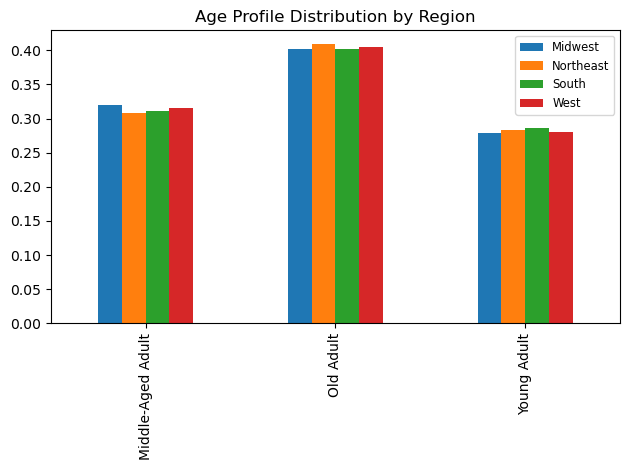

In [154]:
# Create bar chart for age profile in different regions

age_profile_region_bar = age_profile_region_crosstab.plot.bar()
plt.title('Age Profile Distribution by Region')
plt.xlabel('')
plt.legend(fontsize = 'small')
plt.tight_layout()

In [155]:
# Export regional age profile bar chart 

age_profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile_region.png'))

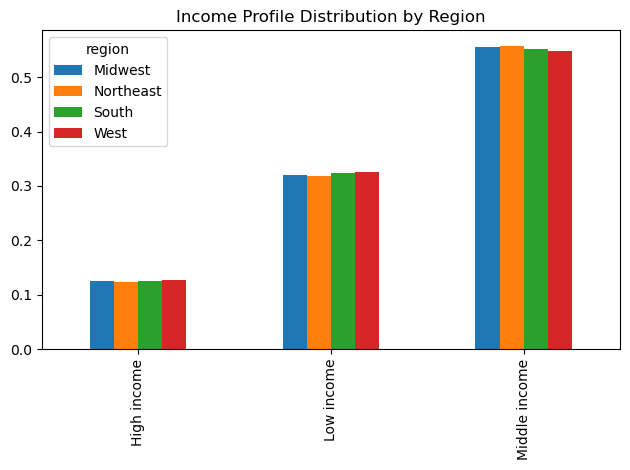

In [156]:
# Create bar chart for income profile in different regions

income_profile_region_bar = income_profile_region_crosstab.plot.bar()
plt.title('Income Profile Distribution by Region')
plt.xlabel('')
plt.tight_layout()

In [157]:
# Export regional income profile bar chart

income_profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile_region.png'))

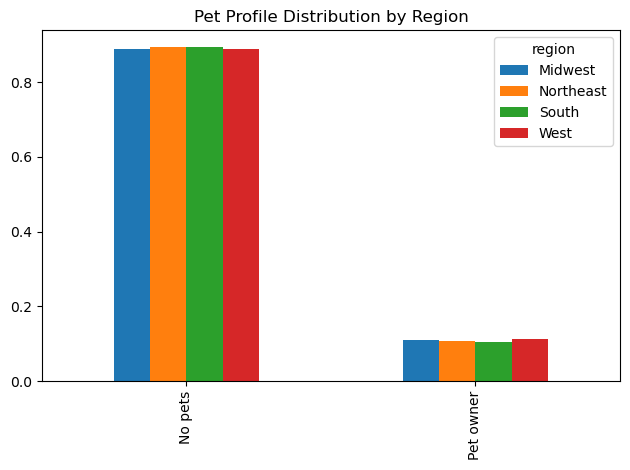

In [158]:
# Create bar chart for pet profile in different regions

pet_profile_region_bar = pet_profile_region_crosstab.plot.bar()
plt.title('Pet Profile Distribution by Region')
plt.xlabel('')
plt.tight_layout()

In [159]:
# Export regional pet profile bar chart

pet_profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_profile_region.png'))

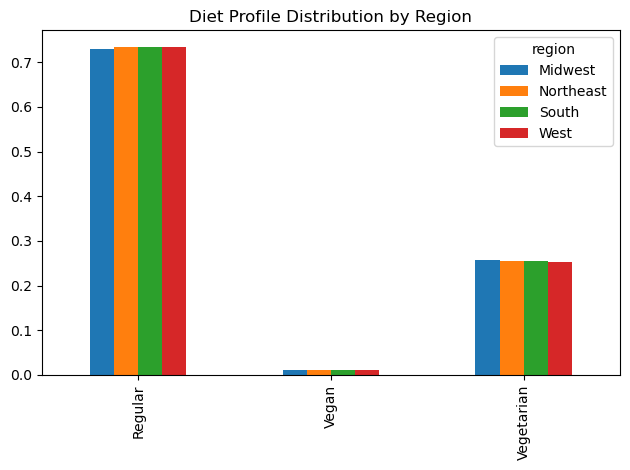

In [160]:
# Create bar chart for diet profile in different regions

diet_profile_region_bar = diet_profile_region_crosstab.plot.bar()
plt.title('Diet Profile Distribution by Region')
plt.xlabel('')
plt.tight_layout()

In [161]:
# Export regional diet profile bar chart

diet_profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_profile_region.png'))

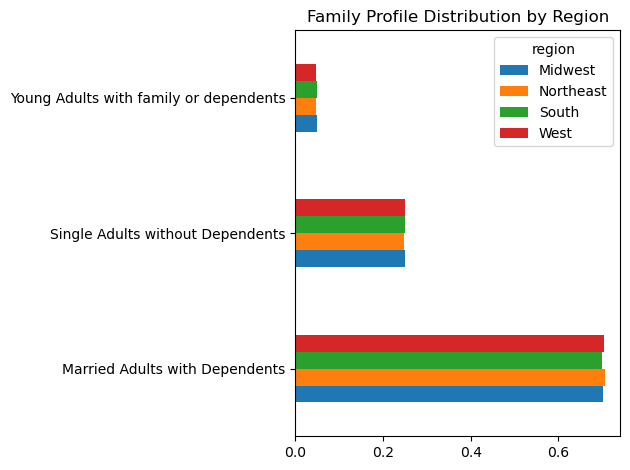

In [247]:
# Create bar chart for family profile in different regions

family_profile_region_bar = family_profile_region_crosstab.plot.barh()
plt.title('Family Profile Distribution by Region')
plt.ylabel('')
plt.tight_layout()

In [248]:
# Export regional family profile bar chart

family_profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_family_profile_region.png'))

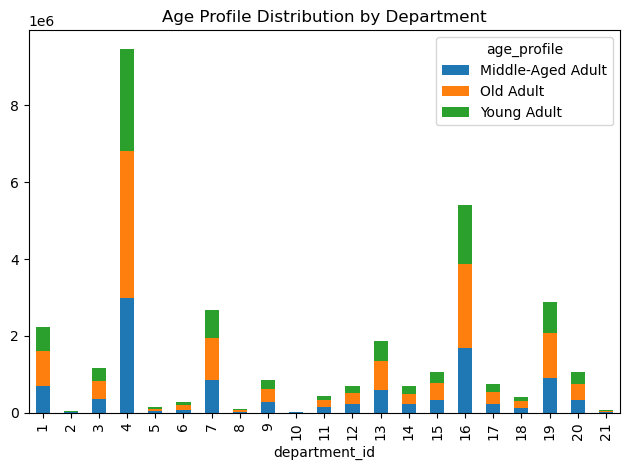

In [164]:
# Create stacked bar chart for age profile in different departments. Need to create a crosstab that swaps the axes of the age_profile_department crosstab

age_profile_department_2_crosstab = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['age_profile'], dropna = False)

age_profile_department_bar = age_profile_department_2_crosstab.plot.bar(stacked = True)
plt.title('Age Profile Distribution by Department')
plt.tight_layout()

In [165]:
# Export department age profile stacked bar chart

age_profile_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_age_profile_department.png'))

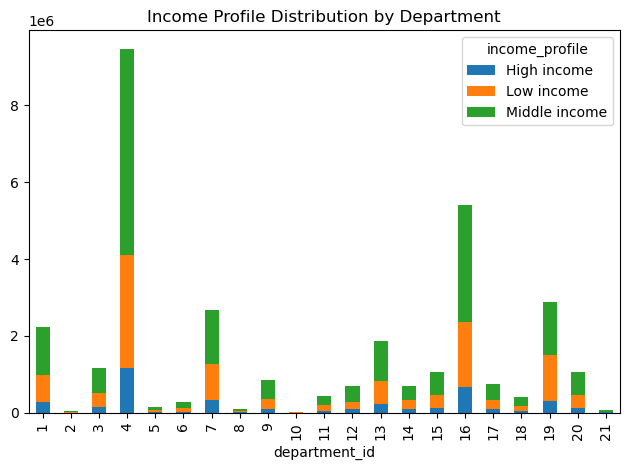

In [166]:
# Create stacked bar chart for income profile in different departments. Need to create a crosstab that swaps the axes of the income_profile_department crosstab

income_profile_department_2_crosstab = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['income_profile'], dropna = False)

income_profile_department_bar = income_profile_department_2_crosstab.plot.bar(stacked = True)
plt.title('Income Profile Distribution by Department')
plt.tight_layout()

In [167]:
# Export department income profile stacked bar chart

income_profile_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_income_profile_department.png'))

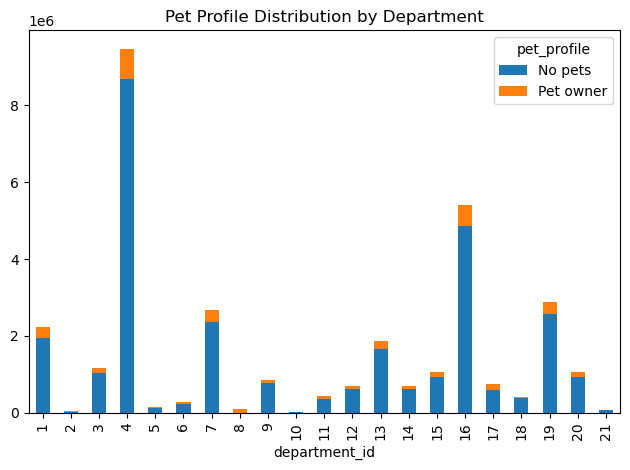

In [168]:
# Create stacked bar chart for pet profile in different departments. Need to create a crosstab that swaps the axes of the pet_profile_department crosstab

pet_profile_department_2_crosstab = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['pet_profile'], dropna = False)

pet_profile_department_bar = pet_profile_department_2_crosstab.plot.bar(stacked = True)
plt.title('Pet Profile Distribution by Department')
plt.tight_layout()

In [169]:
# Export department pet profile stacked bar chart

pet_profile_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_pet_profile_department.png'))

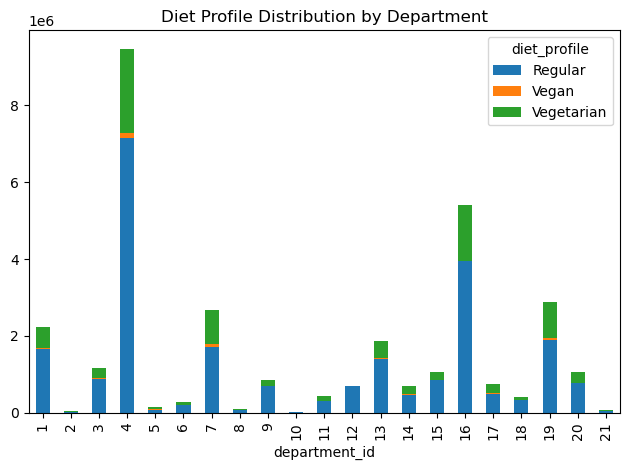

In [170]:
# Create stacked bar chart for diet profile in different departments. Need to create a crosstab that swaps the axes of the diet_profile_department crosstab

diet_profile_department_2_crosstab = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['diet_profile'], dropna = False)

diet_profile_department_bar = diet_profile_department_2_crosstab.plot.bar(stacked = True)
plt.title('Diet Profile Distribution by Department')
plt.tight_layout()

In [171]:
# Export department diet profile stacked bar chart

diet_profile_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_diet_profile_department.png'))

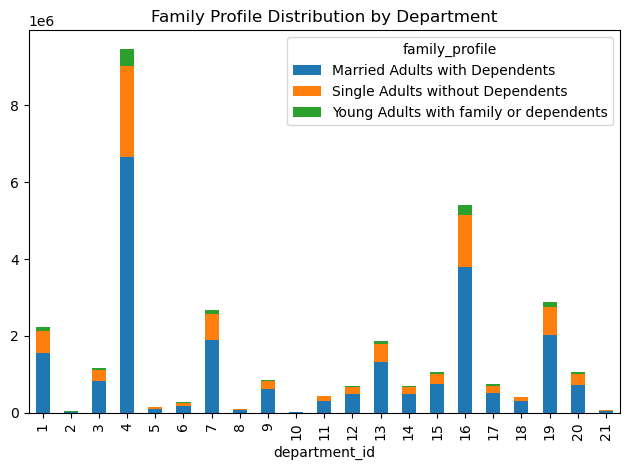

In [172]:
# Create stacked bar chart for family profile in different departments. Need to create a crosstab that swaps the axes of the family_profile_department crosstab

family_profile_department_2_crosstab = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['family_profile'])

family_profile_department_bar = family_profile_department_2_crosstab.plot.bar(stacked = True)
plt.title('Family Profile Distribution by Department')
plt.tight_layout()

In [173]:
# Export department family profile stacked bar chart

family_profile_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_family_profile_department.png'))

## Step 10: Export the final dataset and tidy up the script.

In [174]:
# Export the dataset

ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_final.pkl'))

## Extra Analysis Questions:

### Are certain types of products more popular than others?

In [231]:
# Check frequency values in the department_id column

ords_prods_all['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

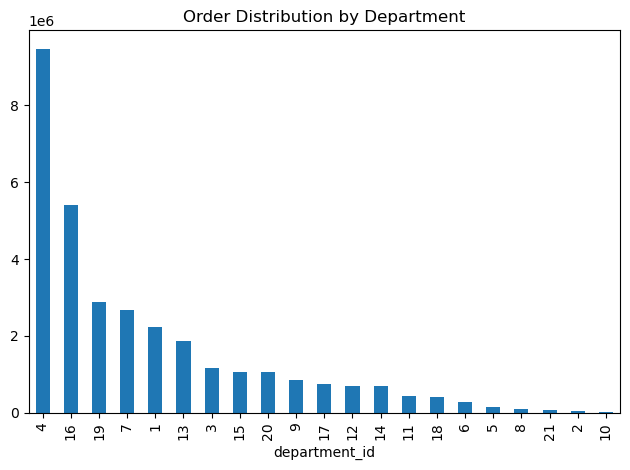

In [232]:
# Create a bar chart showing the values

department_frequency_bar = ords_prods_all['department_id'].value_counts(dropna = False).plot.bar()
plt.title('Order Distribution by Department')
plt.xlabel('department_id')
plt.tight_layout()

In [233]:
# Export the visualization

department_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_frequency.png'))

### Are there differences in ordering habits based on a customer's loyalty status?

In [234]:
# Create a crosstab between ordering habits (department_id) and loyalty status (loyalty_flag)

department_loyalty_crosstab = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['loyalty_flag'], normalize = 'index')

In [235]:
# Check the crosstab

department_loyalty_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,0.272720,0.217154,0.510126
2,0.295252,0.212697,0.492050
3,0.324005,0.190804,0.485191
4,0.332027,0.183202,0.484772
5,0.251945,0.245276,0.502778
6,0.291154,0.212079,0.496767
7,0.318072,0.190791,0.491136
8,0.260643,0.210160,0.529197
9,0.279913,0.218464,0.501623


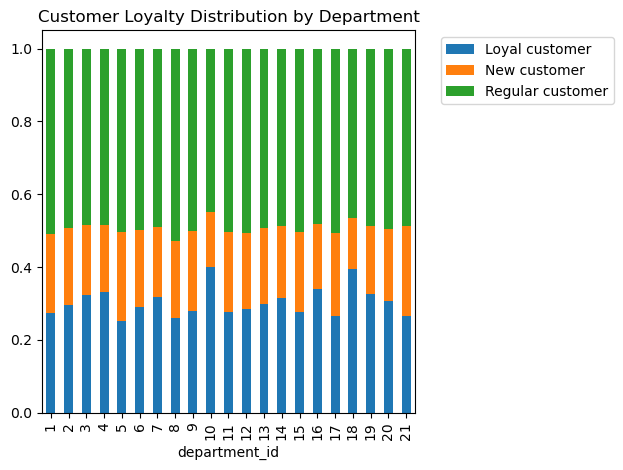

In [236]:
# Create a stacked bar chart to show the results of the crosstab

department_loyalty_bar = department_loyalty_crosstab.plot.bar(stacked = True)
plt.title('Customer Loyalty Distribution by Department')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()

In [237]:
# Export the visualization

department_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_department_loyalty.png'))

### Are there differences in ordering habits based on a customer's region?

In [238]:
# Create a crosstab between ordering habits (department_id) and region

department_region_crosstab = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['region'], normalize = 'index')

In [239]:
# Check the crosstab

department_region_crosstab

region,Midwest,Northeast,South,West
department_id,,,,
1,0.234522,0.174927,0.334669,0.255881
2,0.232013,0.181450,0.336502,0.250034
3,0.233591,0.177921,0.331632,0.256856
4,0.235032,0.175735,0.333416,0.255817
5,0.235439,0.172692,0.335884,0.255986
6,0.236714,0.174152,0.331072,0.258062
7,0.232718,0.179835,0.334412,0.253036
8,0.228775,0.190358,0.319999,0.260868
9,0.235129,0.175180,0.331681,0.258010


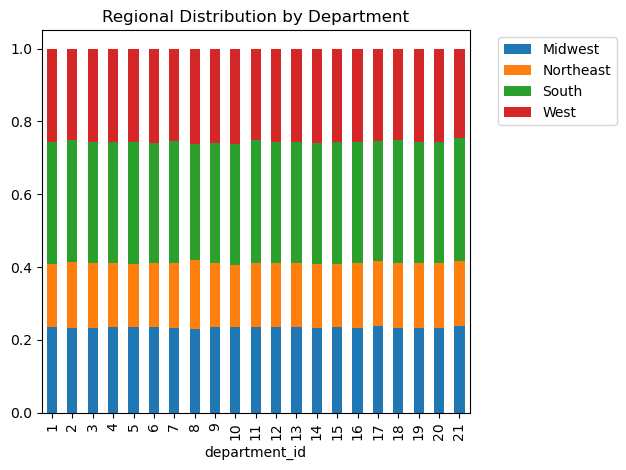

In [240]:
# Create a stacked bar chart to show the results of the crosstab

department_region_bar = department_region_crosstab.plot.bar(stacked = True)
plt.title('Regional Distribution by Department')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
plt.tight_layout()

In [241]:
# Export the visualization

department_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_department_region.png'))